
#   逻辑回归
##  逻辑回归简介
###  hypothesis function
在介绍逻辑回归之前，我们首先需要注意不被名称所误导，尽管里面带有**回归**二字，但它并不是用来解决回归问题，而是用于解决另一个问题即分类问题。下面我们以二分类问题为例来介绍逻辑回归。
在二分类问题中，我们需要判断的数据被分为两类。比如判断一张照片中的人是否在吸烟，这就是一个二分类问题，我们可以将包含吸烟的图片划分为正类，将不包含吸烟的图片划分为负类。我们也可以使用线性回归来解决这个问题：将样本属性值输入到一个线性模型中并设置一个阈值，如果输出值大于这个阈值，则认为该样本为正类，否则认为该样本为负类。但利用线性回归也有缺点，如果训练数据的分布不均衡，会导致拟合的效果不好，而且有的分类器实际并不是一个线性模型。所以我们使用sigmoid函数作为我们的hypothesis function。形式如下：
$$h_\theta(x)=g(\theta^Tx)$$
$$z=\theta^Tx$$
$$g(z)=\frac{1}{1+e^{-z}}$$
使用sigmoid有多个好处，首先我们可以将输出值压缩到[0,1]范围内，这样我们可以通过输出来表示样本为某一类的概率（这里我们约定输出值是样本为正类的概率），而且sigmoid函数是连续的，有利于我们求导以及优化。
###  cost function
确定了hypothesis function之后，我们需要确定cost function，之后我们就可以选择优化算法对cost function进行优化。在线性回归中，我们使用的是均方误差，在逻辑回归里面我们如果继续使用均方误差，那么会导致代价函数成为一个非凸函数，使得我们的优化变得困难。下面我们推导一下逻辑回归的损失函数：
首先令$\hat{y}=g(w^Tx+b)$，我们约定$\hat{y}=P(y=1|x)$,则有：
y=1时$p(y|x)=\hat{y}$;y=0时$p(y|x)=1-\hat{y}$
整合这两个公式，我们可以得到：
$$P(y|x)=\hat{y}^{y}(1-\hat{y})^{1-y}$$
$P(y|x)$是对样本正确预测的概率，显然我们希望这个值越大越好。对上式两边取对数，可以得到：
$$
log(P(y|x))=log(\hat{y}^{y}(1-\hat{y})^{1-y})
                =ylog\hat{y}+(1-y)log(1-\hat{y})
$$
我们令$L(y,\hat{y})=-(ylog\hat{y}+(1-y)log(1-\hat{y}))$将此作为单个样本的代价函数，则当代价函数达到最小时，P(y|x)可以达到最大。
对于总体样本，我们假设所有的样本是独立同分布的，则对于所有的样本，有
$$logP=log\prod_{i=1}^{m}p(y^{(i)}|x^{(i)})=\sum_{i=1}^{m}log(p(y^{(i)}|x^{(i)}))$$
因此我们可以得到总的损失函数为
$$J=-\sum_{i=1}^{m}y^{(i)}log{\hat{y}^{(i)}}+(1-y^{(i)})log(1-\hat{y}^{(i)})$$
###  gradient descent
得到损失函数之后，我们依然使用梯度下降法对损失函数进行优化。经过求导我们可以得到下面的式子：
$$\theta_j:=\theta_j-\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
具体的求导过程大家可以看这个链接。[逻辑回归](https://www.coursera.org/learn/machine-learning/resources/Zi29t)

##  代码实现

1、先尝试调用sklearn的线性回归模型训练数据，尝试以下代码，画图查看分类的结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +',header=None, engine='python') #读取X值
ys = pd.read_csv('./logistic_y.txt', sep='\ +',header=None, engine='python') #读取y值
ys = ys.astype(int)
df_X['label'] = ys[0].values #将X按照y值的结果一一打标签

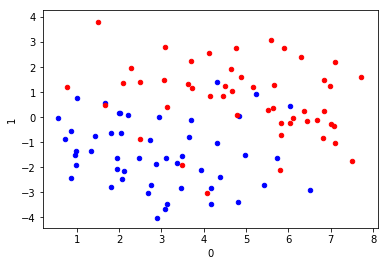

In [3]:
ax = plt.axes()
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [4]:
#提取用于学习的数据
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) 
ys = df_X['label'].values

In [5]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)

Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899


E:\ananconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


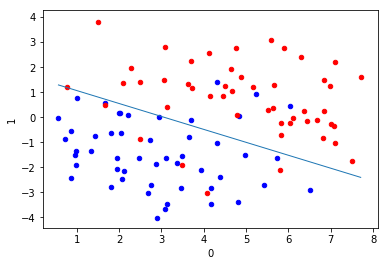

In [6]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
plt.plot(_xs, _ys, lw=1)

2 用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

12576


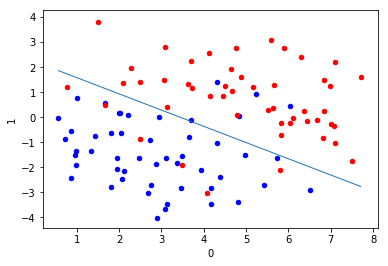

In [11]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        loss_f = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            z = np.dot(X,self.w.T)
            A = 1/(1 + np.exp(-z))
            update = np.dot((A-y).T, X)/m
            loss_next = -(np.dot(np.log(A).T, y)+np.dot(np.log(1 - A).T, (1-y)))/m
            tol = np.abs(loss_next - loss_f)
            loss_f = loss_next
            #print(tol)
            self.w -= alpha*update
            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LGR_GD()
    lr_gd.fit(Xs,ys)

    ax = plt.axes()

    df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
    df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
    _ys = (lr_gd.w[0][0] + lr_gd.w[0][1] * _xs) / (- lr_gd.w[0][2])
    plt.plot(_xs, _ys, lw=1)
    print(lr_gd.n_iters)

3 用牛顿法实现结果，画图和sklearn的结果相比较，并比较牛顿法和梯度下降法迭代收敛的次数¶

In [9]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    def sigmoid(self,X):
        z = X.dot(self.w.T)
        A = 1/(1 + exp(-z))
        return A
    def update(self,X,y):
        A = sigmoid(X)
        return np.dot((A-y).T, X)/m
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        n_iters = 0
        Hessian = np.zeros((d,d))
        loss_f = 0
        #============================= show me your code =======================
        while tol > loss:
            A = 1/(1 + np.exp(-X.dot(self.w.T)))
            grad = np.dot((A-y).T, X)/m
            
            for i in range(d):
                for j in range(d):
                    Hessian[i][j] = np.mean(A*(1 - A)*X[:,i]*X[:,j])
            self.w = self.w - (np.linalg.inv(Hessian).dot(grad.T)).T
            loss_next = -(np.dot(np.log(A).T, y)+np.dot(np.log(1 - A).T, (1-y)))/m
            tol = np.abs(loss_next - loss_f)
            loss_f = loss_next
            
            n_iters += 1
        #============================= show me your code =======================

        self.n_iters = n_iters
        
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)

In [10]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lr_gd.w,lr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-2.60744551  0.75749853  1.17098998]];梯度下降法迭代次数：148050
牛顿法结果参数：[[-2.62049103  0.76036562  1.17193563]];牛顿法迭代次数：22
